<a href="https://colab.research.google.com/github/nanometre380/Phshing_fishing/blob/main/phishingfishing_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv('/content/drive/My Drive/E-pro/phishing/preprocessed_data_for_phishingfishing.csv', index_col = 0)
data_test = pd.read_csv('/content/drive/My Drive/E-pro/phishing/preprocessed_data_for_test.csv', index_col = 0)

In [ ]:
data_test.head()

,url,unshorten,length,at,double_slash,http,hyphen,dot,slash,ip_form,brand,phishing
0,http://www.arrowcase.com/wp-content/plugins/ba...,1,25,0,0,1,0,2,1,0,0.444444,1
1,http://mailupgrade2info.site44.com/redirect.html,1,35,0,0,1,0,2,1,0,0.600000,1
2,http://extravasatingmetalworker.com/,1,36,0,0,1,0,1,1,0,0.750000,1
3,https://crewscontrolmd-my.sharepoint.com/:o:/g...,0,135,0,0,0,2,2,5,0,0.750000,1
4,https://workprotocoles-com.webs.com/,1,36,0,0,0,1,2,1,0,0.500000,1


In [ ]:
df = pd.DataFrame(data)
df_test = pd.DataFrame(data_test)
#df.head()
#df.tail()

In [ ]:
df.loc[(df['unshorten'] == '0'), 'unshorten'] = 0
df.loc[(df['unshorten'] != 0), 'unshorten'] = 1

#df.head()
#len(df)
#df.tail()

In [ ]:
#df.to_csv("modified_ver.csv")

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
#classification_report : 주요 분류 측정 항목 표시 / confusion_matrix : 분류 정확성 평가
#from sklearn.model_selection import train_test_split
#train_test_split : 셋 분리
from sklearn.tree import DecisionTreeClassifier #의사결정트리 모듈
from sklearn import tree

In [ ]:
#X_train = np.array(pd.DataFrame(df, columns=['unshorten', 'length', 'at', 'double_slash', 'http', 'hyphen', 'dot', 'slash', 'ip_form', 'brand']))
X_train = np.array(pd.DataFrame(df, columns=['unshorten', 'length', 'at', 'double_slash', 'http', 'hyphen', 'dot', 'ip_form', 'brand']))
Y_train = np.array(pd.DataFrame(df, columns=['phishing']))

In [ ]:
#X_test = np.array(pd.DataFrame(df_test, columns=['unshorten', 'length', 'at', 'double_slash', 'http', 'hyphen', 'dot', 'slash', 'ip_form', 'brand']))
X_test = np.array(pd.DataFrame(df_test, columns=['unshorten', 'length', 'at', 'double_slash', 'http', 'hyphen', 'dot', 'ip_form', 'brand']))
Y_test = np.array(pd.DataFrame(df_test, columns=['phishing']))

In [ ]:
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [ ]:
X_train

array([[1, 45, 0, ..., 1, 0, 0.5],
       [0, 50, 0, ..., 5, 0, 1.0],
       [0, 40, 0, ..., 4, 0, 0.833333333],
       ...,
       [0, 22, 0, ..., 0, 0, 0.5],
       [0, 20, 0, ..., 0, 0, 0.5],
       [0, 18, 0, ..., 0, 0, 1.0]], dtype=object)

In [ ]:
dt_classifier = DecisionTreeClassifier()

In [ ]:
dt_classifier = dt_classifier.fit(X_train, Y_train)

In [ ]:
dt_prediction = dt_classifier.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print("테스트 정확도 : ", accuracy_score(Y_test, dt_prediction)*100)

테스트 정확도 :  93.65632624607876


In [ ]:
print("훈련 세트 정확도: {:.3f}".format(dt_classifier.score(X_train, Y_train)))
print("테스트 세트 정확도: {:.3f}".format(dt_classifier.score(X_test, Y_test)))

훈련 세트 정확도: 0.956
테스트 세트 정확도: 0.937


In [ ]:
X_test

array([[0, 15, 0, ..., 0, 0, 0.3333333333333333],
       [0, 50, 0, ..., 1, 0, 0.666666667],
       [0, 80, 0, ..., 3, 0, 0.6],
       ...,
       [0, 81, 0, ..., 3, 0, 0.666666667],
       [0, 43, 0, ..., 3, 0, 0.833333333],
       [0, 47, 0, ..., 1, 0, 0.5]], dtype=object)

In [ ]:
dt_prediction

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
testdata_url = data_test['url']
testdata_phish = data_test['phishing']
#testdata_phish
predicted_data = pd.DataFrame({'url':testdata_url, 'phishing':testdata_phish, 'predicted':dt_prediction})
predicted_data.head()
predicted_data.to_csv('predicted_result2.csv')

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.907899 to fit


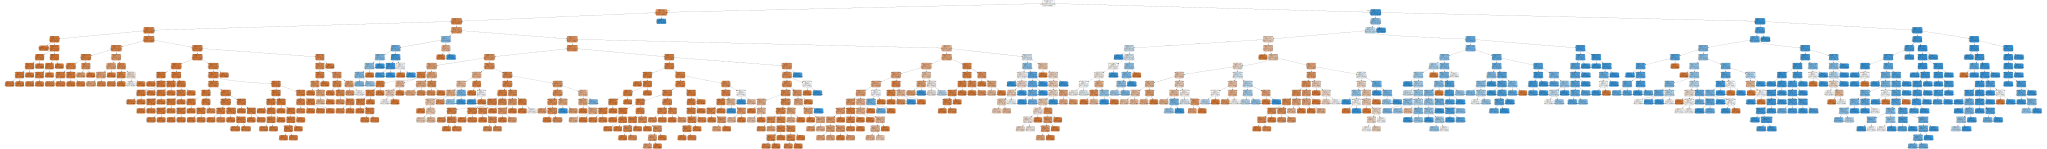

In [ ]:
from sklearn.tree import export_graphviz

export_graphviz(
        dt_classifier,
        out_file="phishing.dot",
        #feature_names=['unshorten', 'length', 'at', 'double_slash', 'http', 'hyphen', 'dot', 'slash', 'ip_form', 'brand'],
        feature_names=['unshorten', 'length', 'at', 'double_slash', 'http', 'hyphen', 'dot', 'ip_form', 'brand'],
        class_names=['Normal','Phishing'],
        rounded=True,
        filled=True
    )

import graphviz
with open("phishing.dot") as f:
    dot_graph = f.read()
dot = graphviz.Source(dot_graph)
dot.format = 'png'
dot.render(filename='decision_tree', directory='images/decision_trees', cleanup=True)
dot

In [ ]:
example = [0., 24., 0., 0., 0., 0., 1., 0., 0.]
example2 = [0., 65., 0., 0., 0., 0., 2., 0., 1.]


def check(value) :
  isPhishing = dt_classifier.predict([value])
  print(isPhishing)

check(example)
check(example2)



[0]
[1]


In [ ]:
len("https://www.notion.so/majorstudy/3fbfc4e60794430fb7ed5caa5ac13c7d")

65

In [ ]:
import pydot

(graph,) = pydot.graph_from_dot_file('phishing.dot')
graph.write_png('decision_tree.png')